## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

### Part 1: Understanding Product Categories
**Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?**

#### 1.Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

#### 2.Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Load the data

data = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/1st lab/amz_uk_price_prediction_dataset.csv')

data.sample(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
916612,997904,B0BJPZP51B,Shiningupup Birthday Gifts For Her Women's Plu...,0.0,0,5.99,False,0,Sports & Outdoors
1162805,1284543,B0CGD1QFKC,Infant Baby Halloween Costume My 1st Halloween...,0.0,0,6.95,False,0,Baby
2216963,2563752,B00OM03010,Dexam 17819198 Vintage Home Turkish Coffeepot ...,4.5,375,15.69,False,0,"Coffee, Tea & Espresso"
1726356,1945945,B00I3DLX9S,STATUS 1 Gang Pattress Box | 25mm Single Socke...,3.4,3,1.12,False,0,Electrical
2177904,2523041,B0C7FGMQMQ,Thermal Leggings Women Fleece Lined Leggings H...,5.0,3,15.19,False,0,Women


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# 1 frequency table for the category column

top5_category = data.category.value_counts()\

top5_category.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

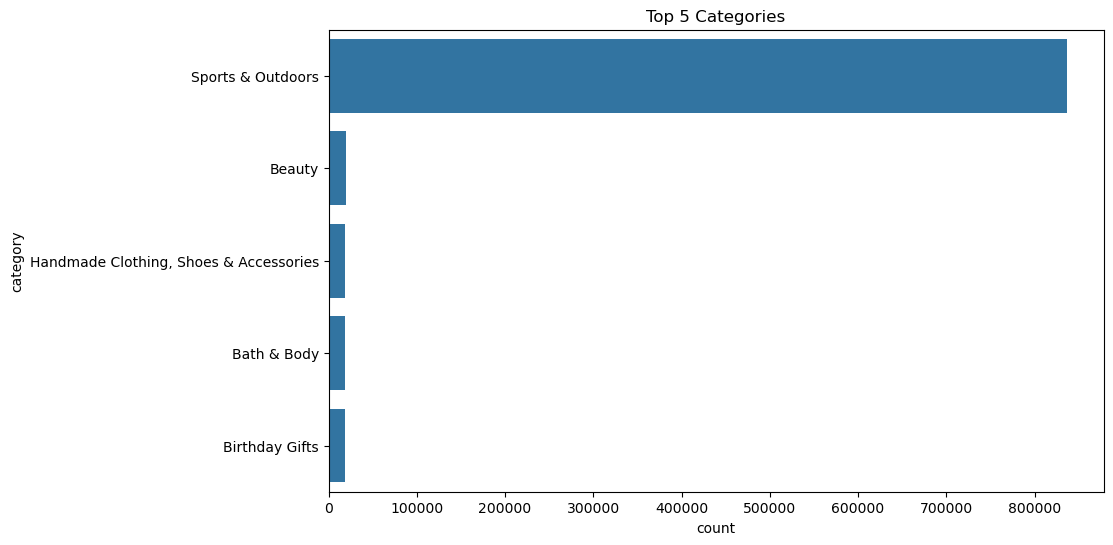

In [7]:
# 2 Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart
# , do it for a subset of top categories.
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='category', order=data['category'].value_counts().index[:5])
plt.title('Top 5 Categories')
plt.show()

# Yes, sports and outdoors dominate the listings.

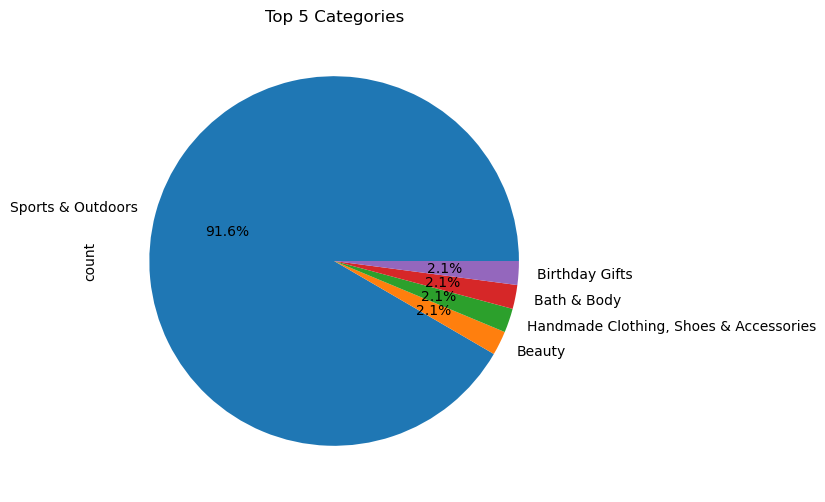

In [10]:
# pie chart of the top 5 categories

plt.figure(figsize=(10, 6))
data['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Categories')
plt.show()

## Part 2: Delving into Product Pricing

**Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?**

#### 1.Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

#### 2.Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

#### 3.Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [13]:
# 1.

data['price'].describe()


count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [15]:
# Price mode

data['price'].mode()

# Both median and mean are higher than the mode, which means that the price distribution is right-skewed.

0    9.99
Name: price, dtype: float64

In [19]:
# 2. 

# Determine the variance, standard deviation, range, and interquartile range for product price.

# Variance

data['price'].var()



119445.4853225653

In [20]:
# Standard deviation

data['price'].std()

345.6088617535223

In [22]:
# Range

data['price'].max() - data['price'].min()

100000.0

In [25]:
# Interquartile range

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

IQR 

# IQR = 36: This means that the middle 50% of the product prices fall within a range of 36 units. This indicates that for half of the products, their prices are relatively close to each other.

# std = 345: A standard deviation of 345 suggests that the prices of the products vary widely from the mean price. This means there are some products with prices that are far from the average price, contributing to the large std.
# The reason for this spread in price values might due to an excess of outliers.

36.0

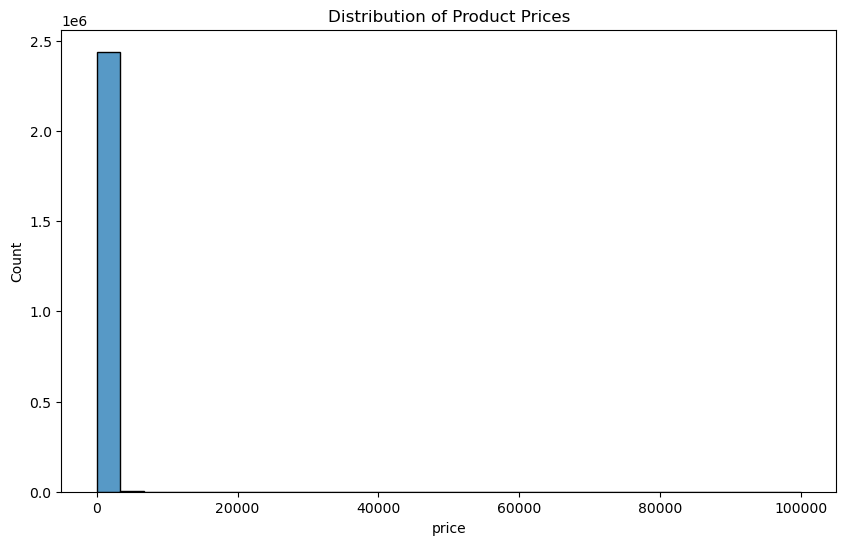

In [28]:
# 3. Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30)
plt.title('Distribution of Product Prices')
plt.show()


Initial Issue: The original histogram showed only one dominant bar due to the high frequency of a particular price point (around $9). This overshadowed the rest of the distribution.
Solutions:
Logarithmic Scale: Applying a log scale to the y-axis helps manage large frequency differences.
Zoomed-In View: Excluding outliers or focusing on a specific price range can reveal more about the distribution of the bulk of the data.


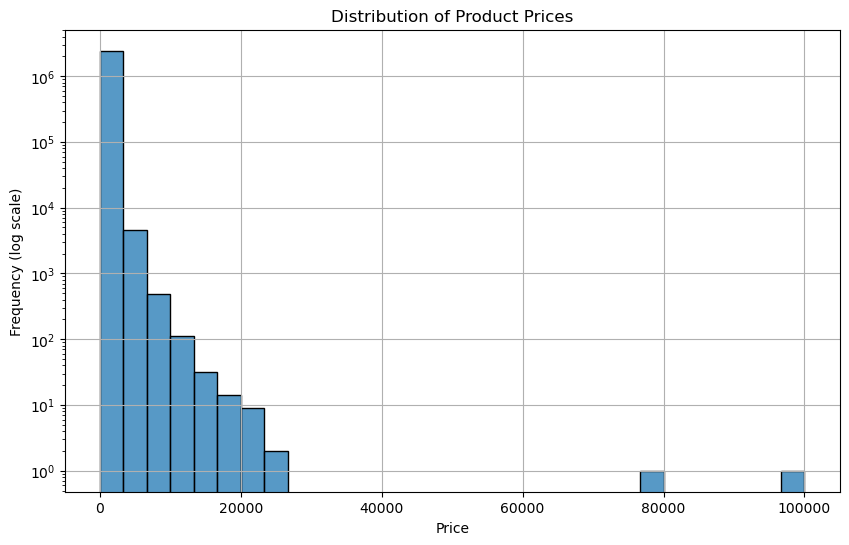

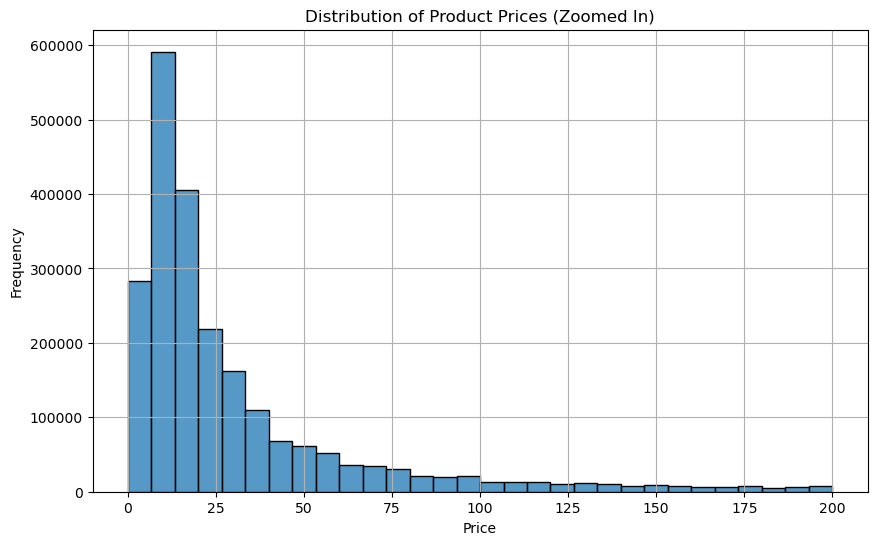

In [32]:
# Plotting histogram with a focus on the majority of the data
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=False)
plt.yscale('log')  # Applying logarithmic scale to y-axis to handle high frequency
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()

# Creating a zoomed-in version to exclude the extreme outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['price'][data['price'] < 200], bins=30, kde=False)
plt.title('Distribution of Product Prices (Zoomed In)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_7448/2768550358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['price'], orient='h', palette="Set2")


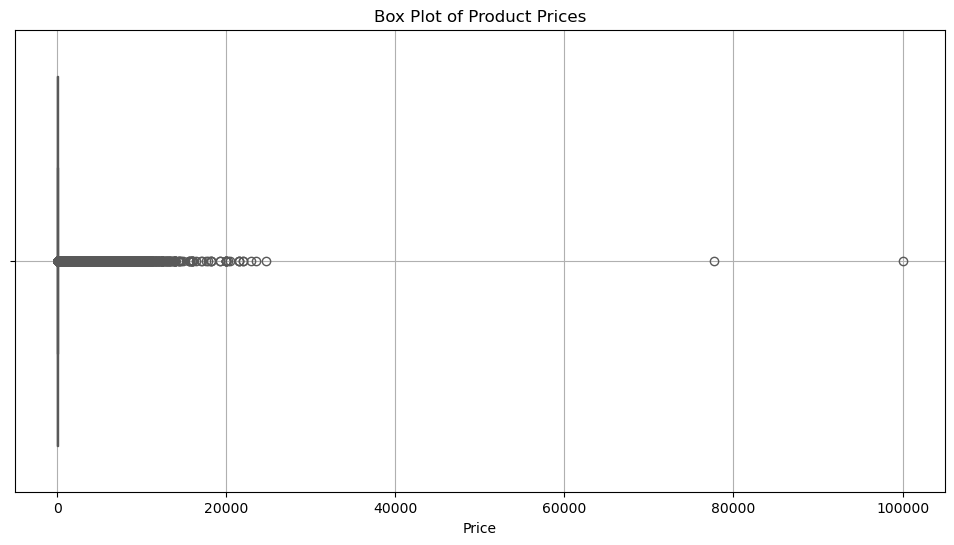

In [33]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

# Creating a box plot to visualize the spread and outliers in product pricing

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], orient='h', palette="Set2")
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?**

#### 1.Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

#### 2.Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

#### 3.Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

#### 4.Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [34]:
data.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1739663,1960800,B09QMT5PXP,"Baby Girl, Deluxe Gift Box",0.0,0,95.50,False,0,Handmade Baby Products
399716,426464,B019EC7ARU,Neoprene Slip on Jazz shoes,4.5,293,23.00,False,0,Women's Sports & Outdoor Shoes
478031,513795,B0B37H4SRF,Joma Sweatshirt breath,0.0,0,38.74,False,0,Sports & Outdoors
1357191,1496197,B0BLK3K65D,KAPLA - Construction Game with 120 coloured wo...,5.0,4,35.99,False,0,Baby & Toddler Toys
67639,73398,B0B4KHB4RR,"Leisurewize - Pack of 2 Portable Tyre Savers, ...",4.2,5,19.99,False,0,Car & Motorbike
995277,1101488,B083TM7C9D,Skull Sketch Print - Skull Picture - Skull Art...,0.0,0,5.00,False,0,Handmade Artwork
1309283,1446391,B0911ZGLT2,Digital Hygrometer Indoor Thermometer Room The...,4.3,862,7.99,False,200,Thermometers & Meteorological Instruments
1889634,2120925,B00N4X3YS0,Lindemann PZ8305-2SB Stainless Steel Shackle S...,0.0,0,4.38,False,0,Sports & Outdoors
732487,790874,B0BZZ2LTD9,Women Smart Watch Bluetooth Fitness Multi Func...,0.0,0,35.18,False,0,Sports & Outdoors
1687375,1900700,B07R1757PP,Toshiba AA Alkaline Batteries 40 Pack | High P...,4.5,880,15.95,False,0,"Household Batteries, Chargers & Accessories"


In [35]:
# 1.

# Calculate the MCT for the rating(stars) column.

data['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [38]:
# Checking for null values on rating

data['stars'].isnull().sum()

0

In [37]:
data['stars'].value_counts()

# Most of the costumers give ratings of 0, or it could be also an absence of rating because we dont have null values in this column.
# The mean is 2.15 which is very low, but these values are biased because of the amount of 0 ratings, so we cannot take conclusions of the product ratings.

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [40]:
# 2. Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?

# Variance

data['stars'].var()

4.81743402976196

In [41]:
# IQR

Q1 = data['stars'].quantile(0.25)
Q3 = data['stars'].quantile(0.75)

IQR = Q3 - Q1

IQR

# As explained earlier there is a huge variation because of the amount of 0 ratings, but as we remove the outliers and focus on the 
# middle 50% of the data, we can see that the ratings are consistent, and they are good with a mean of 4.5.

4.4

In [42]:
# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

# Skewness

data['stars'].skew()

# With 0.08 skewness, the ratings are almost normally distributed, with no evident skewness.

0.08120735761080985

In [43]:
# Kurtosis

data['stars'].kurt()

# We have a negative kurtosis wich has lighter tails and a flatter peak than a normal distribution. Indicates fewer data in the tails and peak. 

-1.9260061280432985

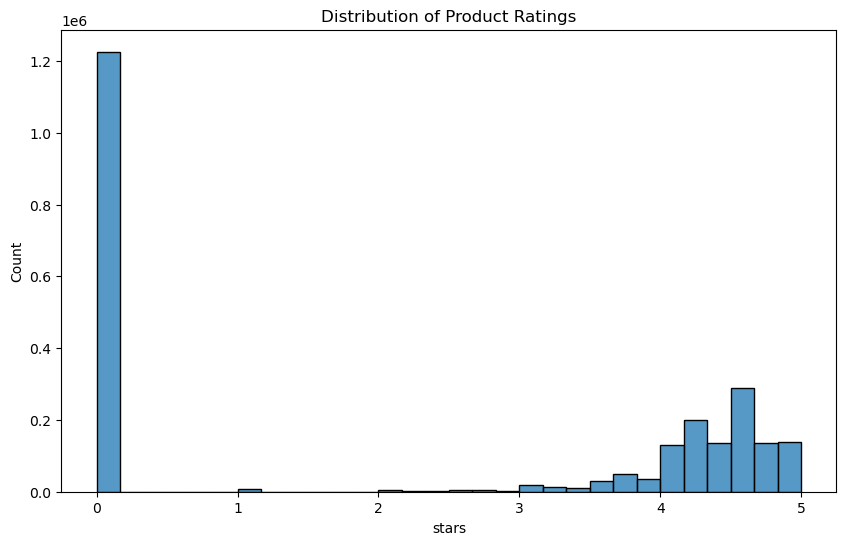

In [44]:
# 4. Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

plt.figure(figsize=(10, 6))
sns.histplot(data['stars'], bins=30)
plt.title('Distribution of Product Ratings')
plt.show()

# Yes, the most common rating is 0 as stated before, but that does not mean anything because it is biased and we dont have information about the 
# veracity of this rating.